# Tamil Nadu PDS (Public Distribution System) Analysis - Dataset - 2019

# Project Description:
This project focuses on analyzing the Public Distribution System (PDS) in Tamil Nadu, India. The PDS is a crucial government initiative to provide essential commodities to the public at subsidized rates. The analysis is performed using data from the Tamil Nadu PDS, which includes information about districts, taluks, villages, and PDS shops.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("tnpds.csv")

In [5]:
df.head()

,Sl.No,District Name,Taluk Name,Village Name,Shop Code,Shop Name
0,1,Ariyalur,Ariyalur,Ariyalur,15DA001PN,Amutham
1,2,Ariyalur,Ariyalur,Ariyalur,15DB001PN,Amaravathi-1
2,3,Ariyalur,Ariyalur,Ariyalur,15DB002PN,Amaravathi-2
3,4,Ariyalur,Ariyalur,Ariyalur,15DB004PN,Amaravathi-III
4,5,Ariyalur,Ariyalur,Ariyalur,15DE001PN,A.C.M.S.1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34773 entries, 0 to 34772
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Sl.No          34773 non-null  int64 
 1   District Name  34773 non-null  object
 2   Taluk Name     34773 non-null  object
 3   Village Name   34773 non-null  object
 4   Shop Code      34773 non-null  object
 5   Shop Name      34773 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.6+ MB


In [7]:
district_counts = df["District Name"].nunique()
taluk_counts = df["Taluk Name"].nunique()
village_counts = df["Village Name"].nunique()
shop_counts = df["Shop Name"].nunique()

print(district_counts,"Districts")
print(taluk_counts,"Taluks")
print(village_counts,"Villages")
print(shop_counts,"PDS Shops")

32 Districts
288 Taluks
16349 Villages
31028 PDS Shops


In [8]:
districts = df["District Name"].unique()

In [9]:
for i in districts:
    district_name = df[df["District Name"]==i]
    taluk_counts = district_name["Taluk Name"].nunique()
    village_counts = district_name["Village Name"].nunique()
    pds_counts = district_name["Shop Name"].nunique()
    
    print(i)
    print(taluk_counts,"Taluks")
    print(village_counts,"Villages")
    print(pds_counts,"PDS Shops")
    print("")

Ariyalur
3 Taluks
261 Villages
436 PDS Shops

Chennai
17 Taluks
197 Villages
1702 PDS Shops

Coimbatore
11 Taluks
368 Villages
1316 PDS Shops

Cuddalore
9 Taluks
1161 Villages
1282 PDS Shops

Dharmapuri
7 Taluks
566 Villages
1042 PDS Shops

Dindigul
9 Taluks
401 Villages
996 PDS Shops

Erode
9 Taluks
363 Villages
1067 PDS Shops

Kanchipuram
9 Taluks
1017 Villages
1368 PDS Shops

Kanyakumari
4 Taluks
182 Villages
763 PDS Shops

Karur
6 Taluks
265 Villages
578 PDS Shops

Krishnagiri
7 Taluks
660 Villages
1065 PDS Shops

Madurai
10 Taluks
510 Villages
1377 PDS Shops

Nagapattinam
8 Taluks
543 Villages
749 PDS Shops

Namakkal
7 Taluks
464 Villages
905 PDS Shops

Nilgiris
6 Taluks
54 Villages
394 PDS Shops

Perambalur
4 Taluks
243 Villages
278 PDS Shops

Pudukkottai
12 Taluks
885 Villages
967 PDS Shops

Ramanathapuram
8 Taluks
372 Villages
770 PDS Shops

Salem
13 Taluks
722 Villages
1483 PDS Shops

Sivagangai
9 Taluks
534 Villages
808 PDS Shops

Thanjavur
9 Taluks
844 Villages
1161 PDS Shop

In [10]:
district_data = df.groupby('District Name').agg(
    {
        'Taluk Name': 'nunique'
    }
)


district_data = district_data.rename(columns={
    'Taluk Name': 'Taluks'
})

top_5_districts_taluks = district_data.sort_values(by=['Taluks'], ascending=False).head(5)

print("Top 5 Districts with Maximum Taluks")
print(top_5_districts_taluks)

Top 5 Districts with Maximum Taluks
               Taluks
District Name        
Chennai            17
Tirunelveli        15
Viluppuram         13
Vellore            13
Salem              13


In [11]:

district_data = df.groupby('District Name').agg(
    {
        'Village Name': 'nunique',
    }
)


district_data = district_data.rename(columns={
    'Village Name': 'Villages',
})

top_5_districts_villages = district_data.sort_values(by=['Villages'], ascending=False).head(5)

print("Top 5 Districts with Maximum Villages")
print(top_5_districts_villages)

Top 5 Districts with Maximum Villages
                 Villages
District Name            
Viluppuram           1411
Thiruvannamalai      1385
Cuddalore            1161
Vellore              1097
Kanchipuram          1017


In [12]:

district_data = df.groupby('District Name').agg(
    {
        'Shop Name': 'nunique'
    }
)


district_data = district_data.rename(columns={
    'Shop Name': 'PDS Shops'
})

top_5_districts_pds_shop = district_data.sort_values(by=['PDS Shops'], ascending=False).head(5)

print("Top 5 Districts with Maximum PDS Shops")
print(top_5_districts_pds_shop)

Top 5 Districts with Maximum PDS Shops
               PDS Shops
District Name           
Viluppuram          1968
Vellore             1735
Chennai             1702
Salem               1483
Tirunelveli         1398


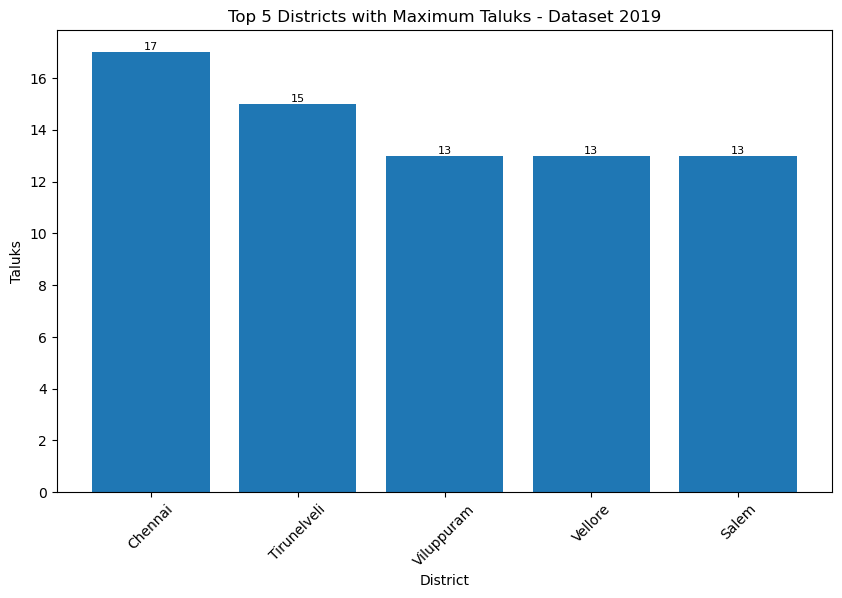

In [13]:
data = top_5_districts_taluks
plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data['Taluks'])
plt.title('Top 5 Districts with Maximum Taluks - Dataset 2019')
plt.xlabel('District')
plt.ylabel('Taluks')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

plt.show()

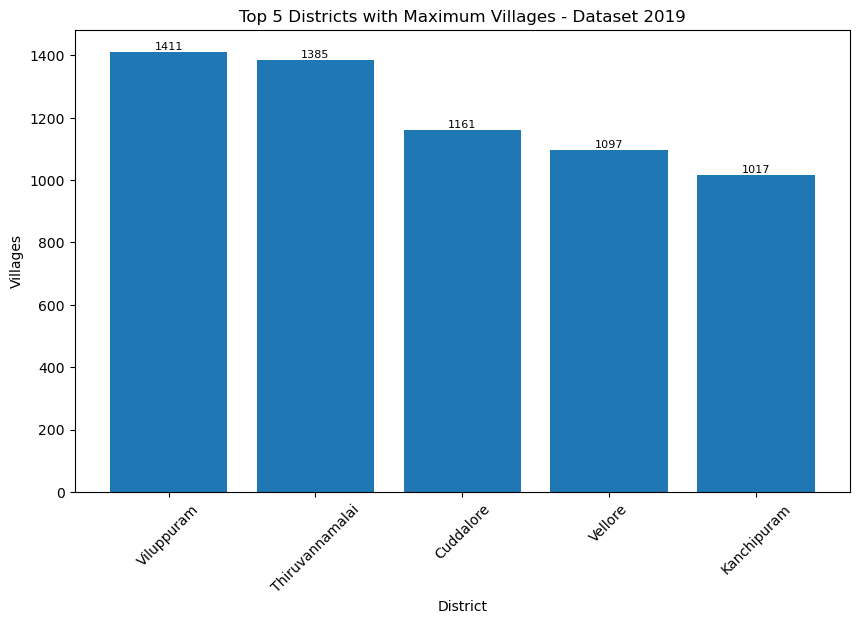

In [14]:
data = top_5_districts_villages
plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data['Villages'])
plt.title('Top 5 Districts with Maximum Villages - Dataset 2019')
plt.xlabel('District')
plt.ylabel('Villages')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

plt.show()

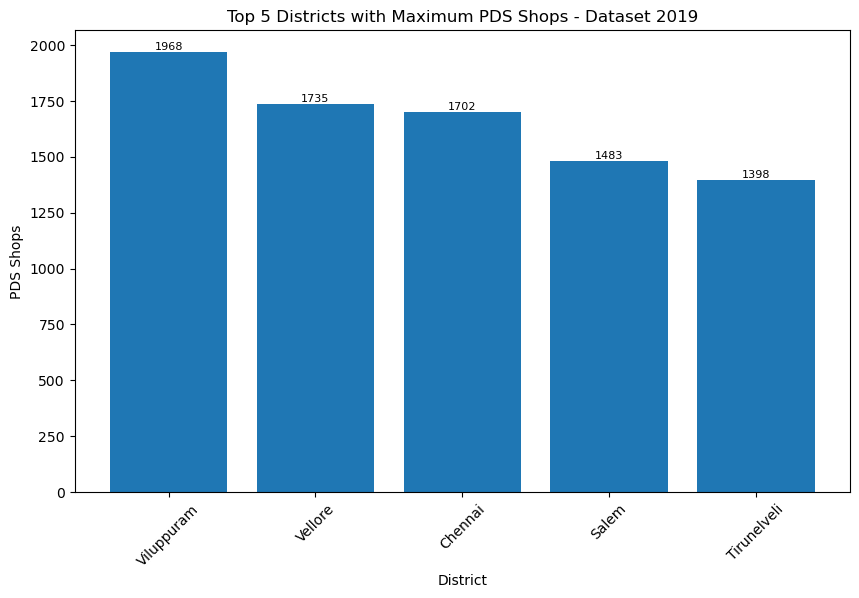

In [15]:
data = top_5_districts_pds_shop
plt.figure(figsize=(10, 6))
bars = plt.bar(data.index, data['PDS Shops'])
plt.title('Top 5 Districts with Maximum PDS Shops - Dataset 2019')
plt.xlabel('District')
plt.ylabel('PDS Shops')
plt.xticks(rotation=45)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom', fontsize=8)

plt.show()